Searching in file... a-0.png
Results found in file  a-0.png


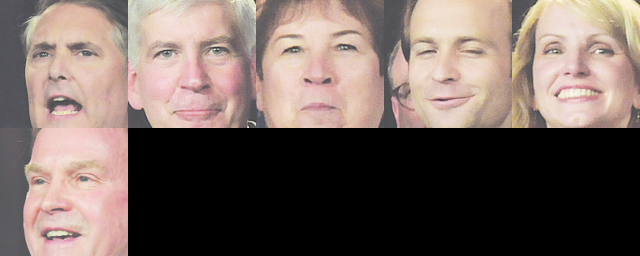

Searching in file... a-1.png
Results found in file  a-1.png


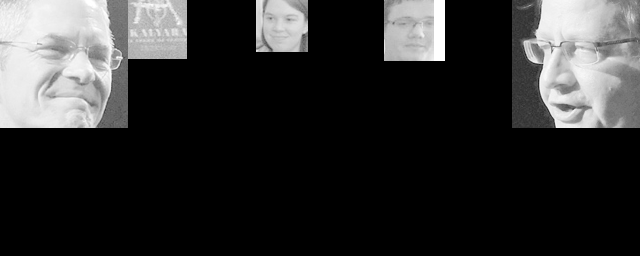

Searching in file... a-10.png
Results found in file  a-10.png
But there were no faces in that file
Searching in file... a-11.png
Searching in file... a-12.png
Searching in file... a-13.png
Results found in file  a-13.png


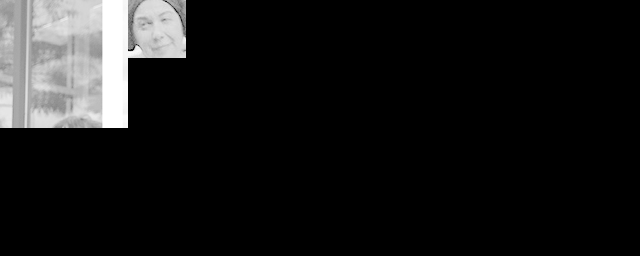

Searching in file... a-2.png
Results found in file  a-2.png


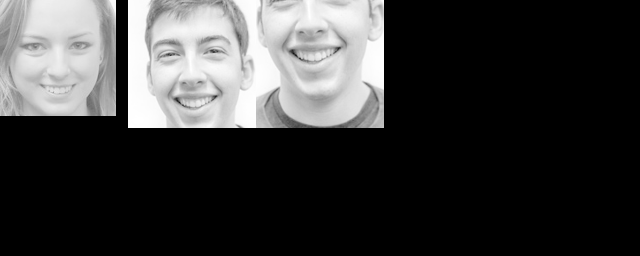

Searching in file... a-3.png
Results found in file  a-3.png


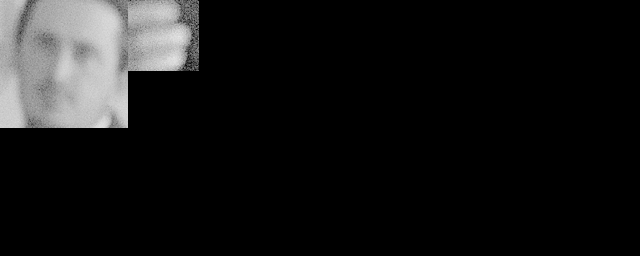

Searching in file... a-4.png
Searching in file... a-5.png
Searching in file... a-6.png
Searching in file... a-7.png
Searching in file... a-8.png
Results found in file  a-8.png


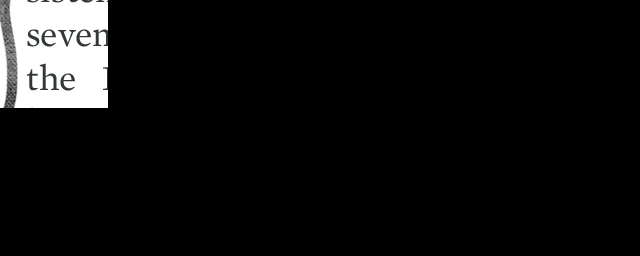

Searching in file... a-9.png


In [49]:
import cv2 as cv
from PIL import Image,ImageDraw
import pytesseract
from zipfile import ZipFile
import numpy
thumb_size = (128, 128)
search_text="Mark"
zipfile_name="images.zip"
face_cascade = cv.CascadeClassifier('haarcascade_frontalface_default.xml')

def detect_faces(pil_img):    
    opencvImage = cv.cvtColor(numpy.array(pil_img), cv.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(opencvImage,1.35)
    images=[]
    for x,y,w,h in faces:
        im1=pil_img.crop((x,y,x+w,y+h))
        im1.thumbnail(thumb_size)
        images.append(im1)
    return images

def make_contactsheet(images):
    w,h=thumb_size
    contact_sheet=Image.new(images[0].mode,(w*5,2*h))
    x=0
    y=0
    for img in images:
        contact_sheet.paste(img,(x,y))
        if x+w == contact_sheet.width:
            x=0
            y=y+h
        else:
            x=x+w
    display(contact_sheet)  


with ZipFile(zipfile_name) as myzip:
    for file in myzip.infolist():
        print("Searching in file...",file.filename)
        with myzip.open(file) as myfile:
            pil_img= Image.open(myfile)
            img=pil_img.convert("L")
            text=pytesseract.image_to_string(img)
            if search_text in text:
                print("Results found in file ",file.filename)
                pil_img=pil_img.convert('RGB')
                images=detect_faces(pil_img)
                if not images:
                    print("But there were no faces in that file")
                else:
                    make_contactsheet(images)
